<a href="https://colab.research.google.com/github/cetinus-gulin/ie423/blob/main/task3-4/task4-gulin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Load data

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

#dfBank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank.csv')
dfBank = pd.read_csv('bank.csv')
dfBank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Analyse data

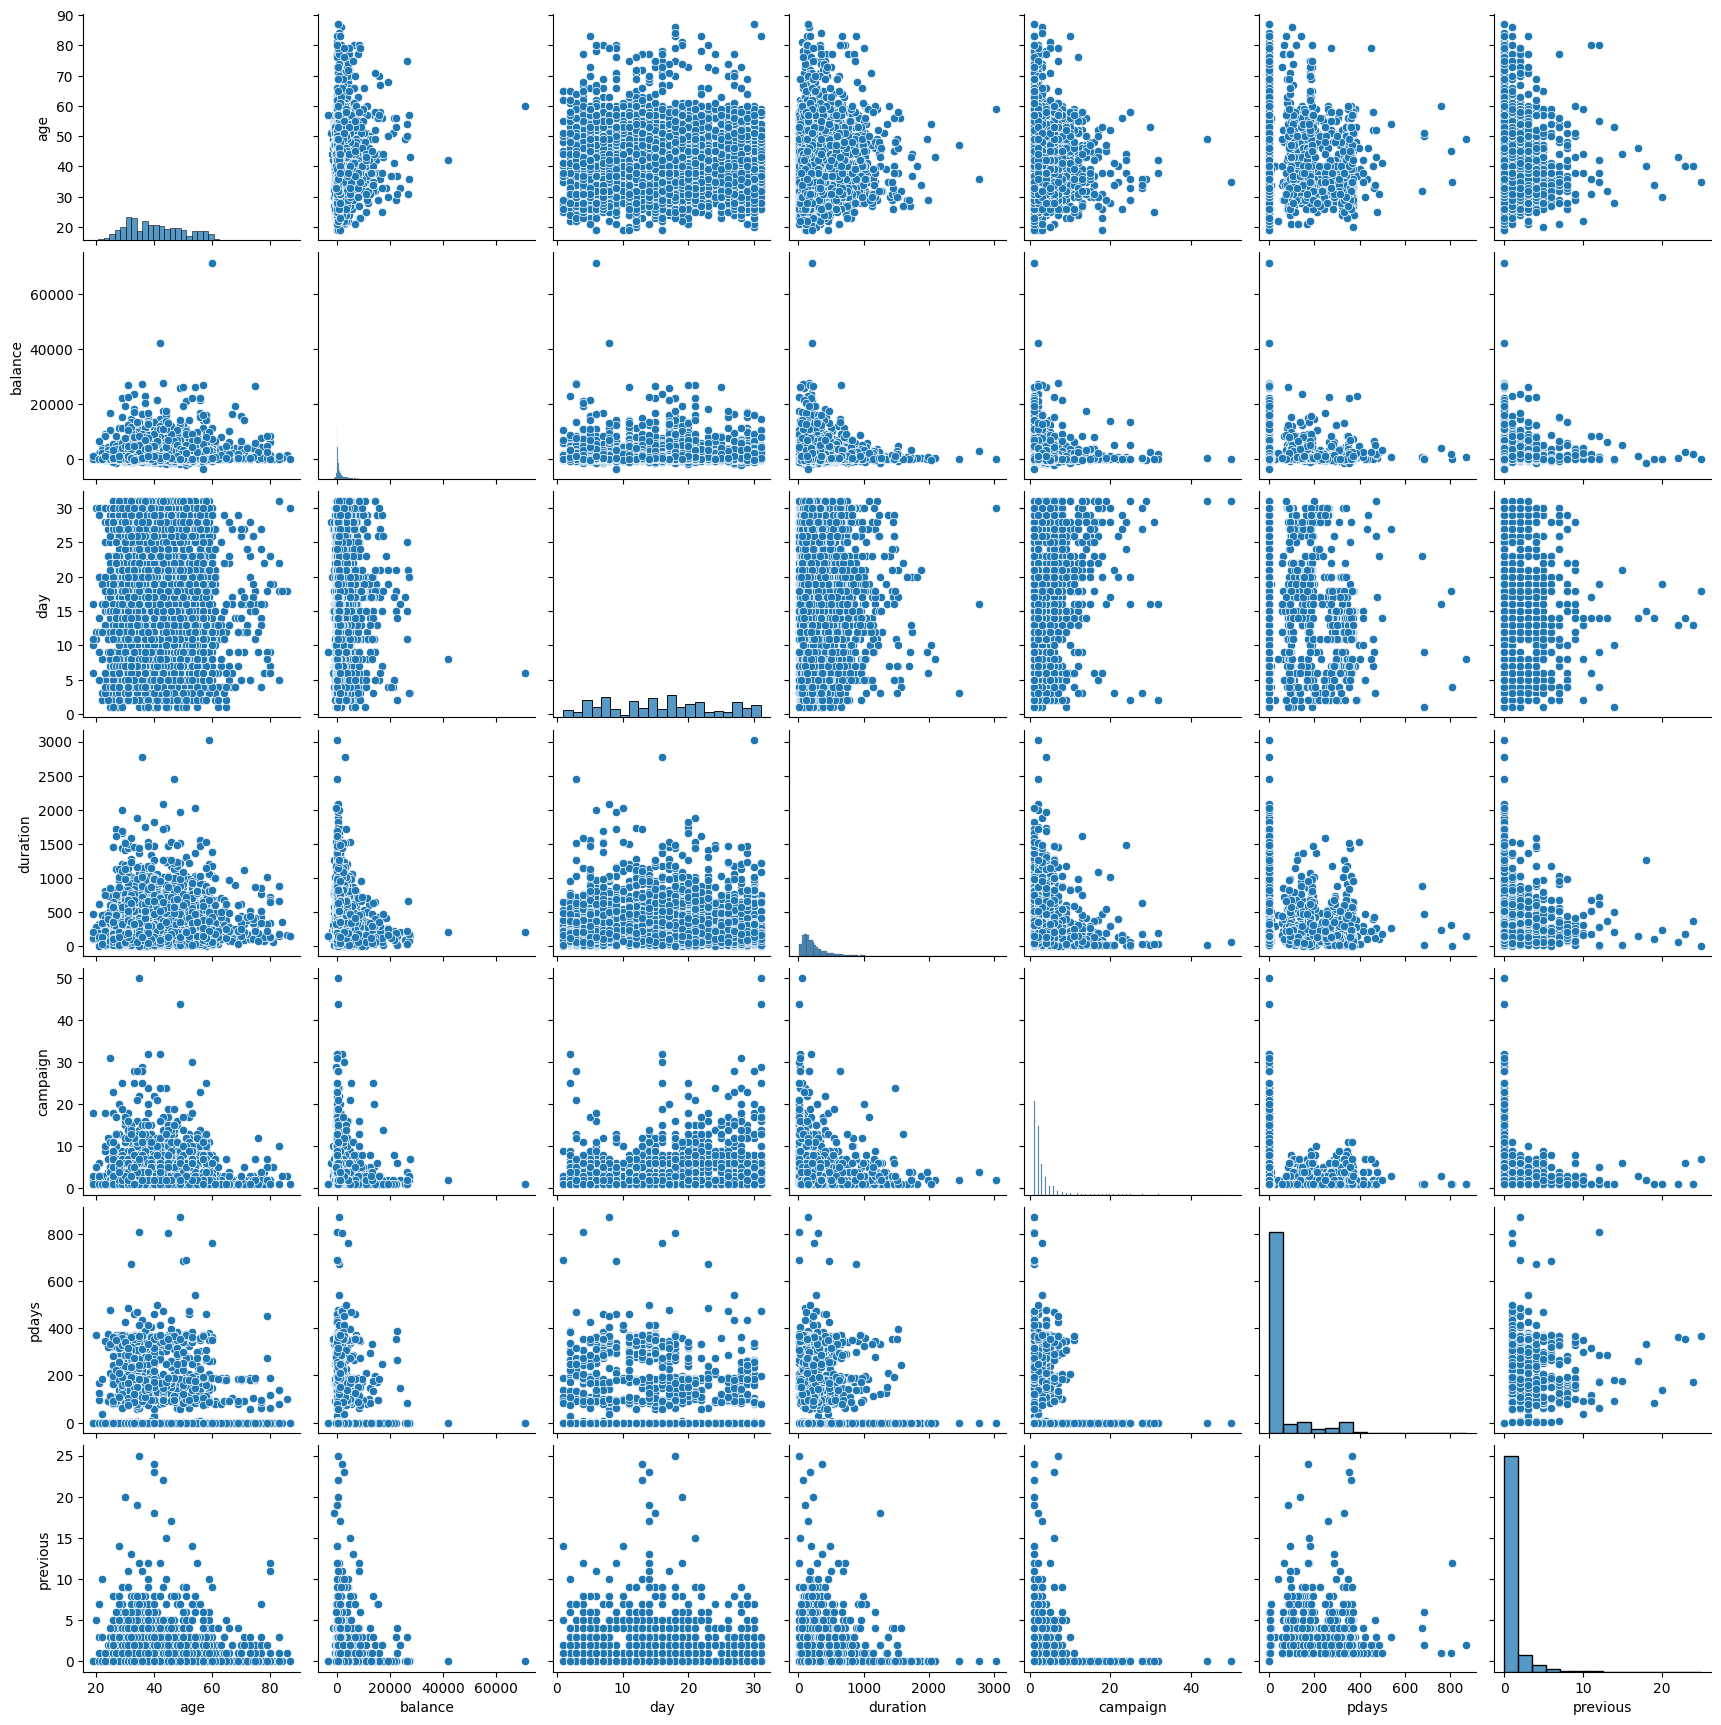

In [3]:
# Plot pair-wise relationships in the dataset
import seaborn as sns
sns.pairplot(dfBank)

Let us dig deeper into the duration-age graph

<Axes: xlabel='duration', ylabel='age'>

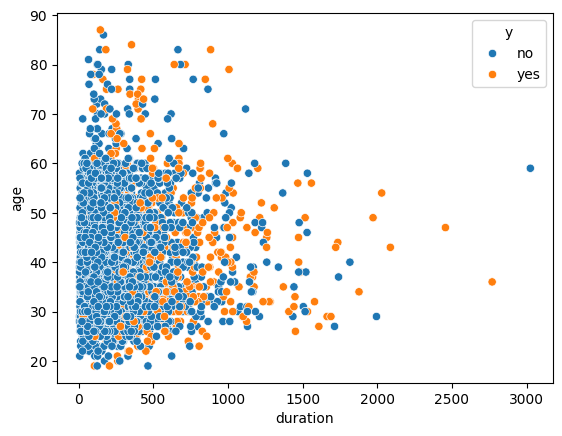

In [4]:
# 3D Scatter plot with hue
sns.scatterplot(x=dfBank['duration'], y=dfBank['age'], hue=dfBank['y'])

# Predicting Subscription

# Logistic Regression

In [5]:
# Scale data to eliminate the effect of feature units (especially for gradient descent cases)
from sklearn.preprocessing import scale
y = dfBank['y']
dfBank_encoded = pd.get_dummies(dfBank.drop(['y'], axis=1))
X = scale(dfBank_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=1)

In [6]:
# Build Logistic Regression model
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=1)
model_lr.fit(X_train, y_train)
y_test_pred = model_lr.predict(X_test)

Performance Result of Linear Regression model

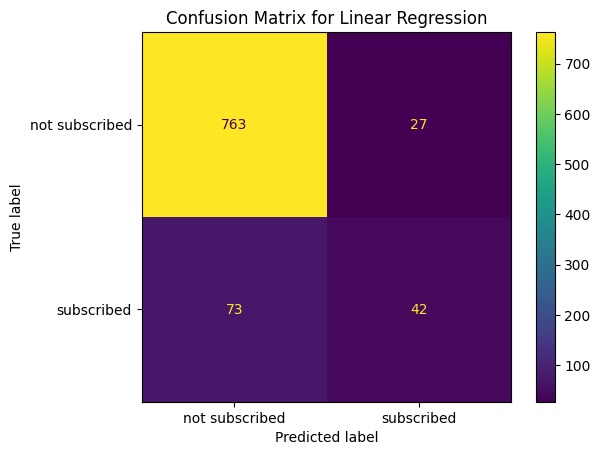

In [7]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for Linear Regression model
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= ["not subscribed", "subscribed"])
disp.plot()
plt.title("Confusion Matrix for Linear Regression")
plt.show()

In [13]:
print("F1 Score: ", f1_score(y_test, y_test_pred, pos_label="yes"))
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred, pos_label="yes"))
print("Precision: ", precision_score(y_test, y_test_pred, pos_label="yes"))

F1 Score:  0.3116883116883117
Accuracy:  0.8828729281767956
Recall:  0.20869565217391303
Precision:  0.6153846153846154


# Naive Bayes

Results (Naive Bayes - Gaussian):

F1 Score: 0.4153846153846154
Accuracy: 0.8320441988950277
Recall: 0.46956521739130436
Precision: 0.3724137931034483

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.88      0.90       790
         yes       0.37      0.47      0.42       115

    accuracy                           0.83       905
   macro avg       0.65      0.68      0.66       905
weighted avg       0.85      0.83      0.84       905



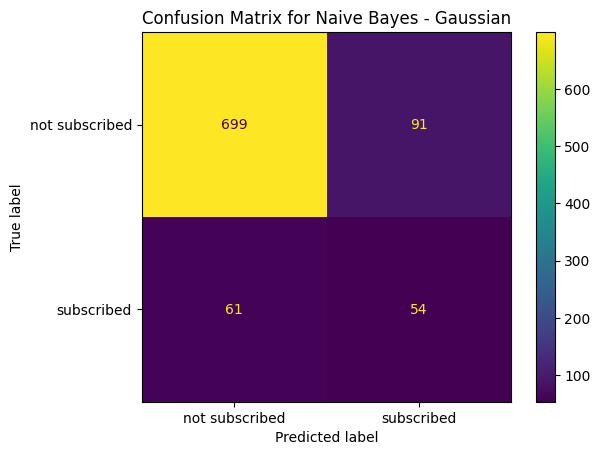

In [10]:
# Build Naive Bayes - Gaussian model
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train,y_train)
y_test_pred = model_nb.predict(X_test)

print ('Results (Naive Bayes - Gaussian):\n')

print("F1 Score: ", f1_score(y_test, y_test_pred, pos_label="yes"))
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred, pos_label="yes"))
print("Precision: ", precision_score(y_test, y_test_pred, pos_label="yes"))

print ('\nClassification Report:')
print (classification_report(y_test, y_test_pred))

conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= ["not subscribed", "subscribed"])
disp.plot()
plt.title("Confusion Matrix for Naive Bayes - Gaussian")
plt.show()

# K-Nearest Neighbour (KNN)

Results (K-Nearest Neighbour - n = 3:

F1 Score: 0.140625
Accuracy: 0.8784530386740331
Recall: 0.0782608695652174
Precision: 0.6923076923076923

Classification Report:
              precision    recall  f1-score   support

          no       0.88      0.99      0.93       790
         yes       0.69      0.08      0.14       115

    accuracy                           0.88       905
   macro avg       0.79      0.54      0.54       905
weighted avg       0.86      0.88      0.83       905



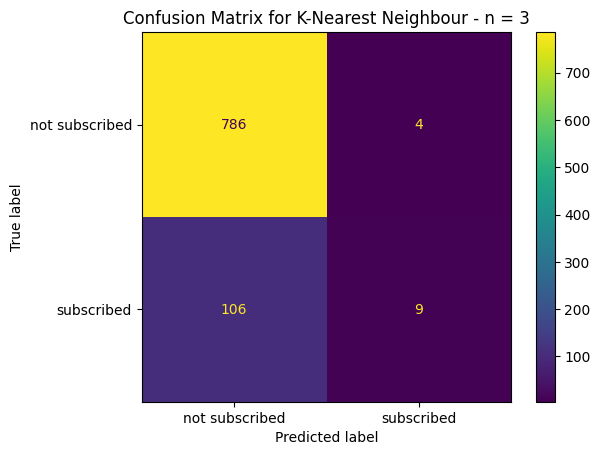

In [11]:
# Build KNN model with 5 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train, y_train)
y_test_pred = model_knn.predict(X_test)

print ('Results (K-Nearest Neighbour - n = 3:\n')

print("F1 Score: ", f1_score(y_test, y_test_pred, pos_label="yes"))
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred, pos_label="yes"))
print("Precision: ", precision_score(y_test, y_test_pred, pos_label="yes"))

print ('\nClassification Report:')
print (classification_report(y_test, y_test_pred))

conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= ["not subscribed", "subscribed"])
disp.plot()
plt.title("Confusion Matrix for K-Nearest Neighbour - n = 3")
plt.show()

# Support Vector Machines

Results (Support Vector Classifier):

F1 Score: 0.3116883116883117
Accuracy: 0.8828729281767956
Recall: 0.20869565217391303
Precision: 0.6153846153846154

Classification Report:
              precision    recall  f1-score   support

          no       0.89      0.98      0.94       790
         yes       0.62      0.21      0.31       115

    accuracy                           0.88       905
   macro avg       0.76      0.59      0.62       905
weighted avg       0.86      0.88      0.86       905



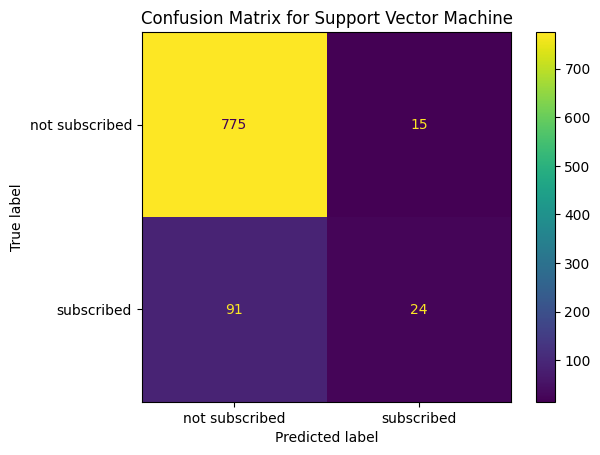

In [12]:
# Build Support Vector Machines - Classifier model

from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train, y_train)
y_test_pred = model_svm.predict(X_test)

print ('Results (Support Vector Classifier):\n')

print("F1 Score: ", f1_score(y_test, y_test_pred, pos_label="yes"))
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred, pos_label="yes"))
print("Precision: ", precision_score(y_test, y_test_pred, pos_label="yes"))

print ('\nClassification Report:')
print (classification_report(y_test, y_test_pred))

conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= ["not subscribed", "subscribed"])
disp.plot()
plt.title("Confusion Matrix for Support Vector Machine")
plt.show()

# Takeways

- Highest F1 score is achieved in linear regression model (0.456), worst achieved in K-NN (0.140). 
- The accuracy score is similar for all four models, around 0.85±0.03.
- The highest recall score is achieved in Naive Bayes model (0.469), worst achieved in K-NN (0.078).
- The highest precision score is achieved in K-NN model (0.692), worst achieved in Naive Bayes (0.372).

- The reason for having this much leap between some score may be caused by the imbalance of the dataset, as the dataset has around 8:1 ratio of no:yes.